In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Bengaluru_House_Data.csv")

In [5]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


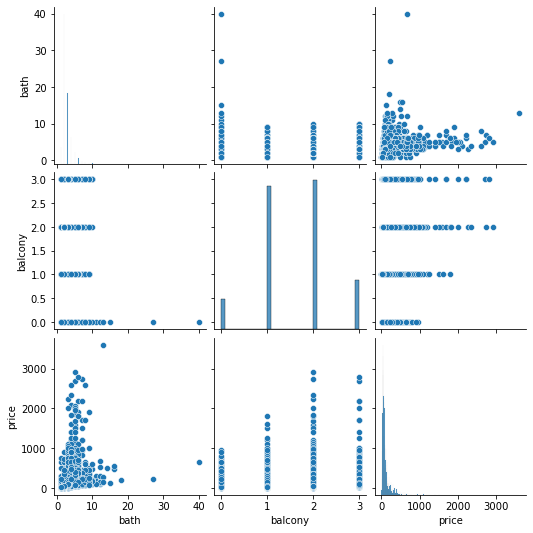

In [6]:
sns.pairplot(data)

In [7]:
data.shape

(13320, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
14-Nov               1
16-Nov               1
16-Oct               1
16-Jul               1
15-Jun               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                   540
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
                            ... 
kanakapura main road           1
D Souza Layout                 1
Annasandrapalya                1
Neelasandra                    1
Electronic City Phase 1,       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom  

In [10]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [11]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
data.drop(columns=['area_type','availability','balcony'],inplace=True)

In [13]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   society     7818 non-null   object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [15]:
data['location'].value_counts()

Whitefield                   540
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
                            ... 
kanakapura main road           1
D Souza Layout                 1
Annasandrapalya                1
Neelasandra                    1
Electronic City Phase 1,       1
Name: location, Length: 1305, dtype: int64

In [16]:
data['location']=data['location'].fillna('Sarjapur Road')

In [17]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
43 Bedroom       1
19 BHK           1
14 BHK           1
27 BHK           1
12 Bedroom       1
16 BHK           1
18 Bedroom       1
13 BHK           1
Name: size, dtype: int64

In [18]:
data['size']=data['size'].fillna('2 BHK')

In [19]:
data['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [20]:
data['bath']=data['bath'].fillna(data['bath'].median())

In [21]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [22]:
data[data.bhk > 20]

,location,size,society,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,NaN,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,NaN,2400,40.0,660.0,43


In [23]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
def convertRange(x):
    
    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [25]:
data['total_sqft']=data['total_sqft'].apply(convertRange)

In [26]:
data.head()

,location,size,society,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,NaN,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,NaN,1200.0,2.0,51.00,2


### Price Per Squre Feet

In [27]:
data['price_per_sqft'] = data['price']*100000 / data['total_sqft']

In [28]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [29]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft', ylabel='price'>

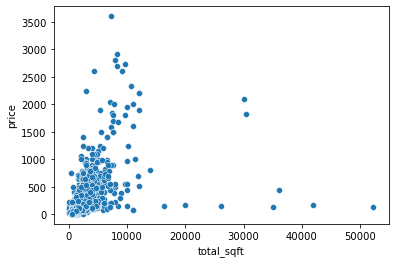

In [30]:
sns.scatterplot(data['total_sqft'], data['price'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft', ylabel='price'>

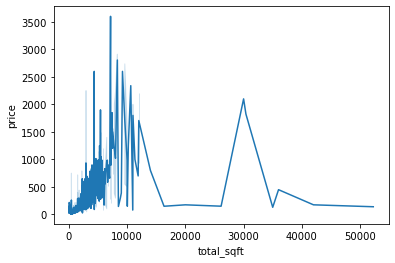

In [31]:
sns.lineplot(data['total_sqft'], data['price'])

In [32]:
data['location'].value_counts()

Whitefield                   540
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
                            ... 
kanakapura main road           1
D Souza Layout                 1
Annasandrapalya                1
Neelasandra                    1
Electronic City Phase 1,       1
Name: location, Length: 1306, dtype: int64

In [33]:
data['location'] = data['location'].apply(lambda x:x.strip())
location_count=data['location'].value_counts()

In [34]:
location_count

Whitefield               541
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
Marathalli bridge          1
BEML Layout 5th stage      1
2nd Block Hbr Layout       1
Marathi Layout             1
Ganganahalli               1
Name: location, Length: 1295, dtype: int64

In [35]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

1st Block Koramangala    10
Sector 1 HSR Layout      10
Naganathapura            10
Gunjur Palya             10
Kalkere                  10
                         ..
Marathalli bridge         1
BEML Layout 5th stage     1
2nd Block Hbr Layout      1
Marathi Layout            1
Ganganahalli              1
Name: location, Length: 1054, dtype: int64

In [36]:
data['location']=data['location'].apply(lambda x: 'order' if x in location_count_less_10 else x)

In [37]:
data['location'].value_counts()

order                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Thyagaraja Nagar        11
Pattandur Agrahara      11
LB Shastri Nagar        11
Narayanapura            11
Banjara Layout          11
Name: location, Length: 242, dtype: int64

### Outlier Detection and Removal

In [38]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<AxesSubplot:xlabel='total_sqft'>

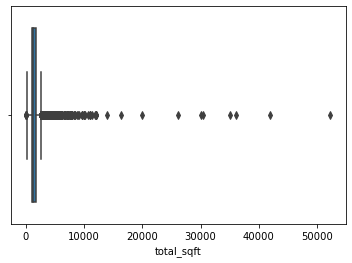

In [39]:
sns.boxplot(x = data['total_sqft'])

In [40]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [41]:
data = data[((data['total_sqft']/data['bhk']) >= 300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


<AxesSubplot:xlabel='bath'>

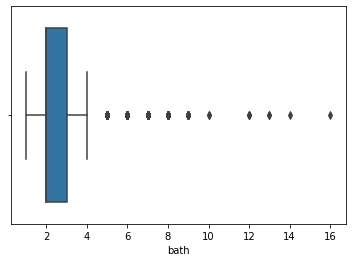

In [42]:
sns.boxplot(x = data['bath'])

In [43]:
data.shape

(12530, 8)

In [44]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [45]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        
        st = np.std(subdf.price_per_sqft)
         
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output, gen_df], ignore_index = True)
    return df_output
data = remove_outliers_sqft(data)
data.describe()
    

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [46]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft) ,
                'count': bhk_df.shape[0]
            }
            #print(lication,bhk_stats)
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')



In [47]:
data = bhk_outlier_remover(data)

In [48]:
data.shape

(7361, 8)

In [49]:
data

,location,size,society,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,NaN,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,NaN,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,NaN,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,Bhsic C,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,NaN,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...,...
10292,order,2 BHK,NaN,1200.0,2.0,70.0,2,5833.333333
10293,order,1 BHK,NaN,1800.0,1.0,200.0,1,11111.111111
10296,order,2 BHK,OlarkLa,1353.0,2.0,110.0,2,8130.081301
10297,order,1 Bedroom,NaN,812.0,1.0,26.0,1,3201.970443


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7361 entries, 0 to 10300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        7361 non-null   object 
 1   size            7361 non-null   object 
 2   society         4817 non-null   object 
 3   total_sqft      7361 non-null   float64
 4   bath            7361 non-null   float64
 5   price           7361 non-null   float64
 6   bhk             7361 non-null   int32  
 7   price_per_sqft  7361 non-null   float64
dtypes: float64(4), int32(1), object(3)
memory usage: 488.8+ KB


In [51]:
data.drop(columns=['size','price_per_sqft'],inplace=True)

In [52]:
data.drop(columns=['society'],inplace=True)

### Cleaned Data

In [53]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [54]:
# sns.pairplot(data)

In [55]:
data.to_csv("Cleaned_data.csv")

In [56]:
X=data.drop(columns=['price'])
y=data['price']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5888, 4)
(1473, 4)
(5888,)
(1473,)


In [60]:
y_train

6703    120.00
3157     89.56
4845     75.00
1       194.00
3375    380.00
         ...  
6062     41.68
3985     39.00
2007     90.00
3197     48.24
3342     48.50
Name: price, Length: 5888, dtype: float64

In [61]:
#data['society'] = data['society'].astype('|S')

## Applying Linear Regression

In [62]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['location']), remainder='passthrough')

In [63]:
scaler = StandardScaler()

In [64]:
lr = LinearRegression(normalize=True)

In [65]:
pipe = make_pipeline(column_trans, scaler, lr)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7361 entries, 0 to 10300
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7361 non-null   object 
 1   total_sqft  7361 non-null   float64
 2   bath        7361 non-null   float64
 3   price       7361 non-null   float64
 4   bhk         7361 non-null   int32  
dtypes: float64(3), int32(1), object(1)
memory usage: 316.3+ KB


In [67]:
# # x='R ra  R'
# # for x in X_train:
# X_train['R ra  R']

In [68]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [69]:
y_pred_lr = pipe.predict(X_test)

In [70]:
r2_score(y_test, y_pred_lr)

0.8233514886476566

In [79]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 3865 to 6738
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    1473 non-null   object 
 1   total_sqft  1473 non-null   float64
 2   bath        1473 non-null   float64
 3   bhk         1473 non-null   int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 51.8+ KB


In [71]:
#data

In [88]:
# Define a dictionary containing employee data
data = {'location':['aaa'],
        'total_sqft':[1000],
        'bath':[3],
        'bhk':[4]}

In [89]:
df2 = pd.DataFrame([['aaa',1000,3,4]], columns=['location','total_sqft', 'bath', 'bhk'])

In [90]:
pipe.predict(df2)

ValueError: Found unknown categories ['aaa'] in column 0 during transform

In [74]:
x_test1=pd.X_test([['aaa',1000,3,4]], columns=['location','total_sqft','bath','bhk'])

AttributeError: module 'pandas' has no attribute 'X_test'

### Applying Lasso

In [ ]:
lasso = Lasso()

In [ ]:
pipe = make_pipeline(column_trans,scaler,lasso)

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

### Applying ridge

In [ ]:
ridge = Ridge()

In [ ]:
pipe = make_pipeline(column_trans,scaler, ridge)

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test, y_pred_ridge)

In [ ]:
print("No Regularization: ", r2_score(y_test, y_pred_lr))
print("Lasso: ", r2_score(y_test, y_pred_lasso))
print("Ridge: ", r2_score(y_test, y_pred_ridge))

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe, open('RidgeModel.pkl','wb'))